In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns

In [111]:
df = pd.read_csv("C:/Users/vamsh/OneDrive/Desktop/ML project/adult.csv")
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [112]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [113]:
df.columns = df.columns.str.replace(".", "_")

In [114]:
# saprate catigorical and numerical features
catigorical_features = df.select_dtypes(include="object").columns
numerical_features = df.select_dtypes(exclude="object").columns

In [115]:
catigorical_features

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [116]:
numerical_features

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [117]:
# fetch the unique value from catigorical data
for i in catigorical_features:
    print(i,df[i].unique())
    
    print()
    print("*****************************Seperated_Columns********************************")
    print()

workclass ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

*****************************Seperated_Columns********************************

education ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

*****************************Seperated_Columns********************************

marital_status ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

*****************************Seperated_Columns********************************

occupation ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

*****************************Seperated_Columns*****************

In [118]:
df['workclass'].mode()

0    Private
Name: workclass, dtype: object

In [119]:
# remove ? and replace with mode value # .mode()
df["workclass"] = df["workclass"].replace('?', 'private')
df["occupation"] = df["occupation"].replace('?','Prof-specialty')
df["native_country"] = df["native_country"].replace('?','United-States')

In [120]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
private              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Data Visualization

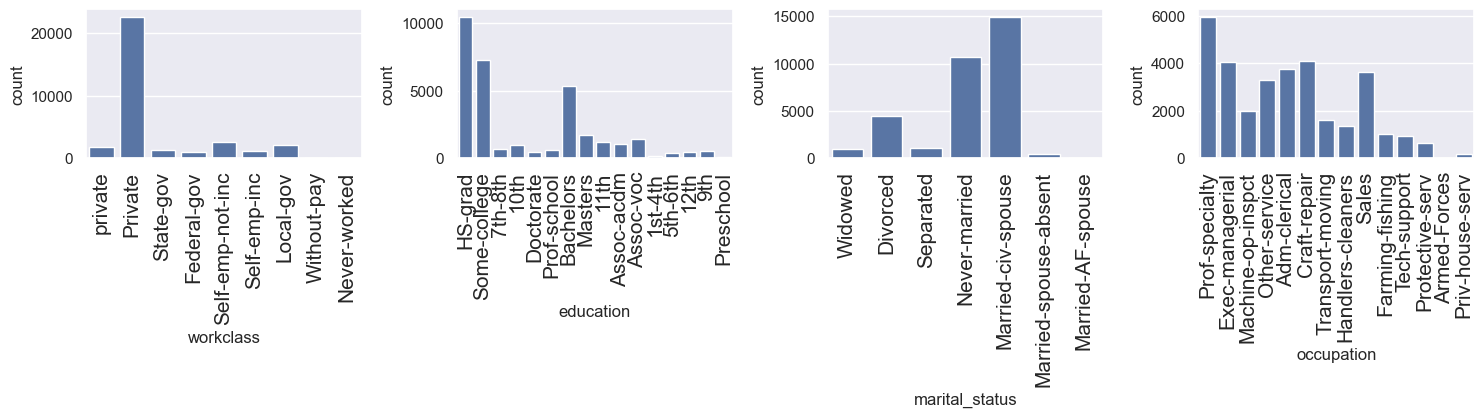

In [121]:
plt.style.use('fivethirtyeight')
sns.set(rc={"figure.figsize":(15,6)})

colmns1 = ['workclass', 'education', 'marital_status', 'occupation']

for i in range(0,len(colmns1)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=df[colmns1[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

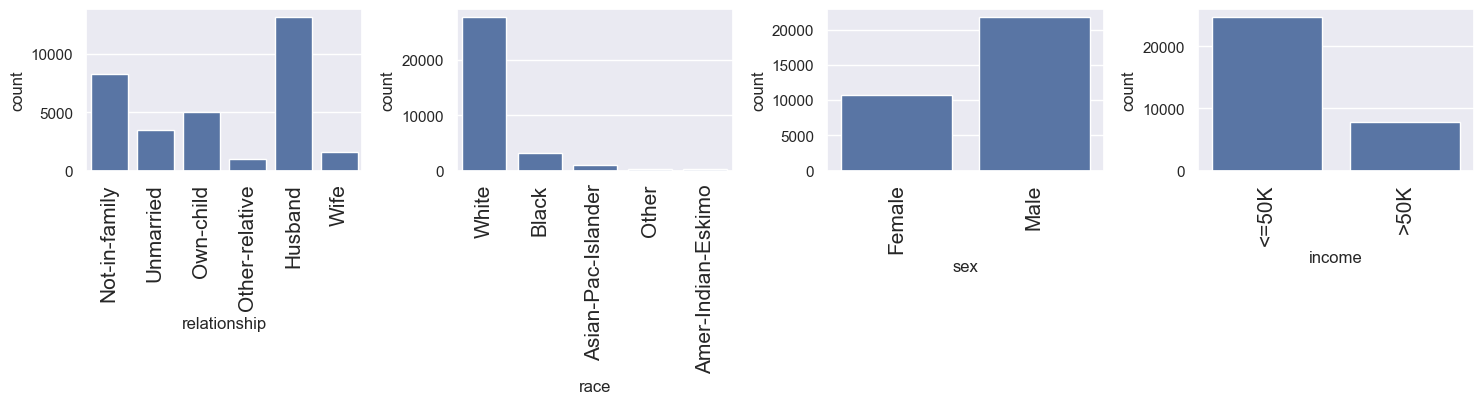

In [122]:
colmns2 = ['relationship', 'race', 'sex', 'income']

for i in range(0,len(colmns2)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=df[colmns2[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

C:\Users\vamsh\AppData\Local\Temp\ipykernel_3856\3554325141.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[numerical_features[i]])
C:\Users\vamsh\AppData\Local\Temp\ipykernel_3856\3554325141.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[numerical_features[i]])
C:\Users\vamsh

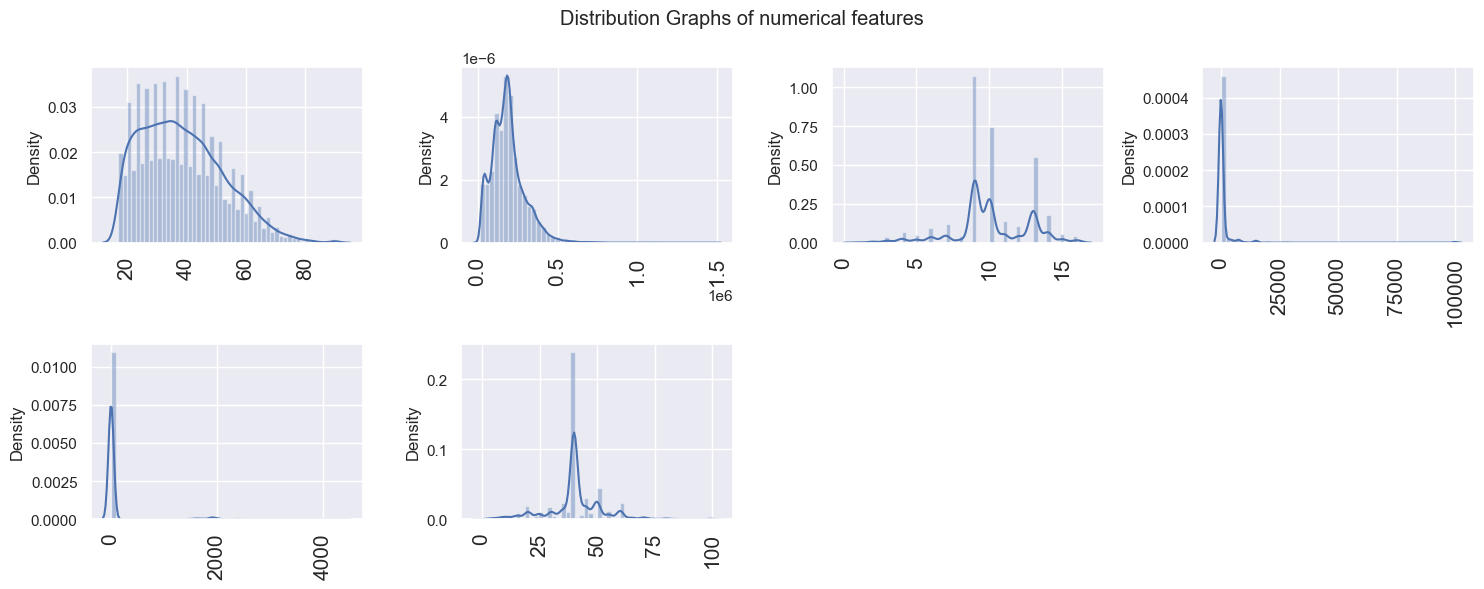

In [123]:
plt.suptitle("Distribution Graphs of numerical features")
for i in range(0,len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.distplot(x=df[numerical_features[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

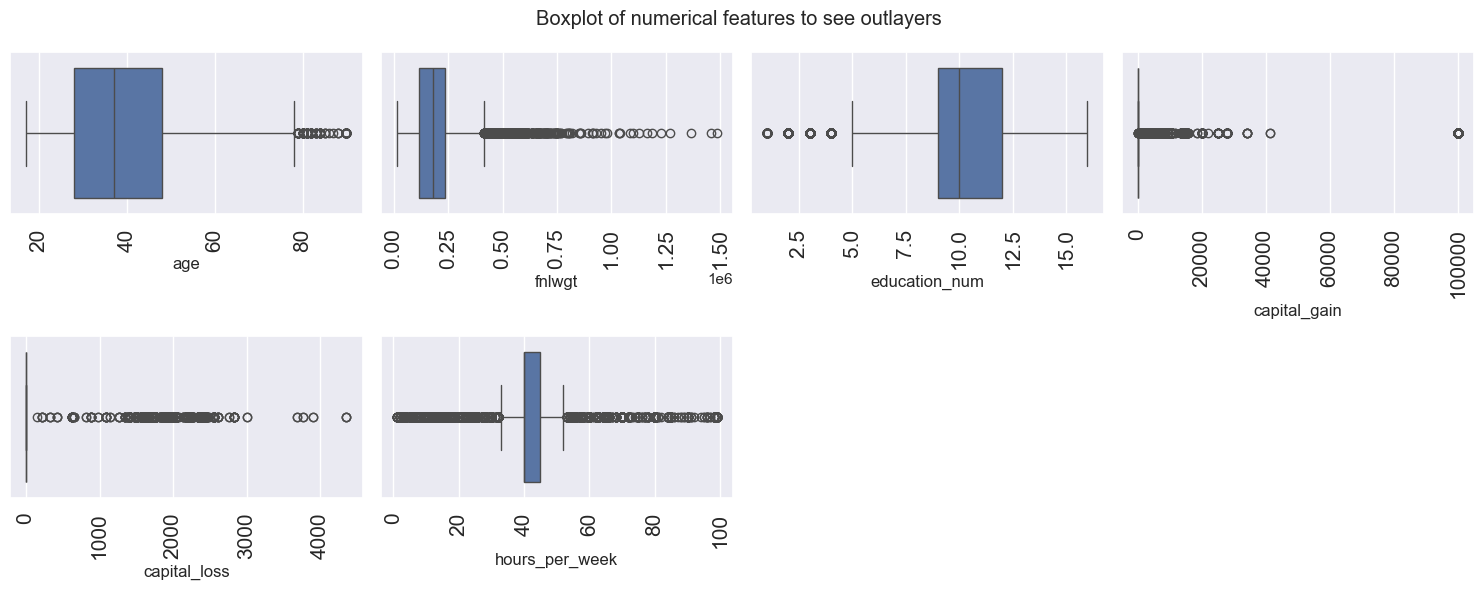

In [124]:
plt.suptitle("Boxplot of numerical features to see outlayers ")
for i in range(0,len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=df[numerical_features[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

In [125]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [126]:
age_outliers =  df['age'] > 80
age_outliers.describe()

count     32561
unique        2
top       False
freq      32462
Name: age, dtype: object

In [127]:
fnlwgt_outliers = df['fnlwgt'] < 0.50
fnlwgt_outliers.value_counts()

fnlwgt
False    32561
Name: count, dtype: int64

<Axes: xlabel='income'>

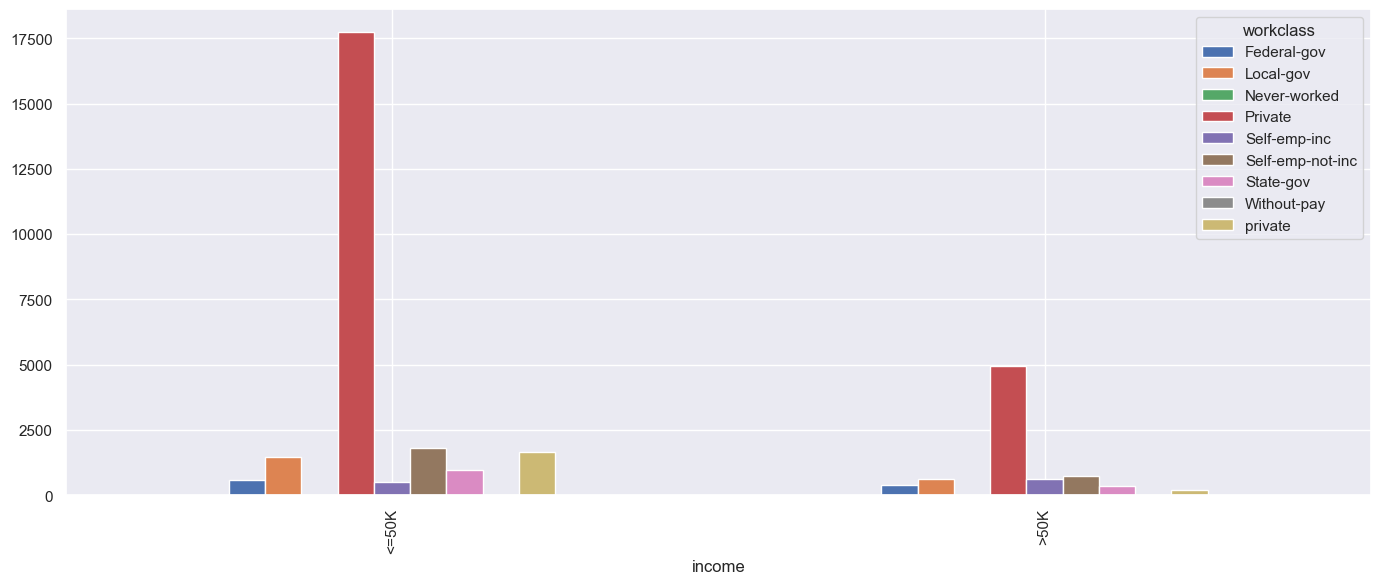

In [128]:
salary = pd.crosstab(df['income'], df['workclass'])
salary.plot(kind='bar')

<Axes: xlabel='income'>

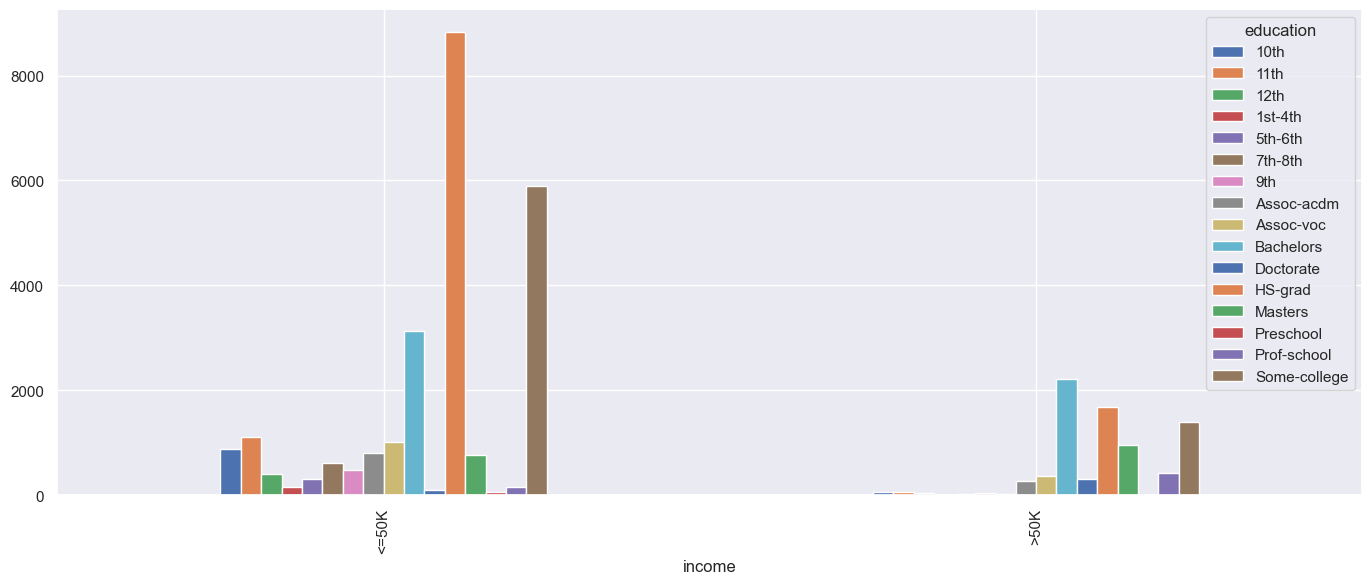

In [129]:
education = pd.crosstab(df['income'], df['education'])
education.plot(kind='bar')

<Axes: xlabel='income'>

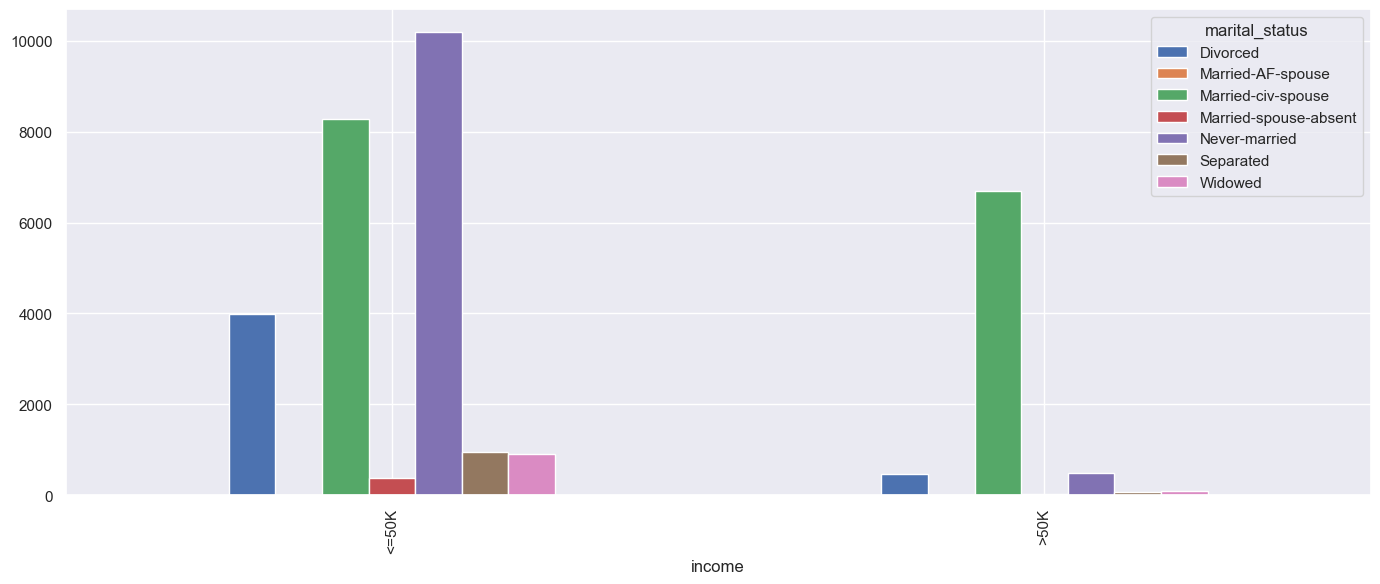

In [130]:
marital_status = pd.crosstab(df['income'],df['marital_status'])
marital_status.plot(kind="bar")

<Axes: xlabel='income'>

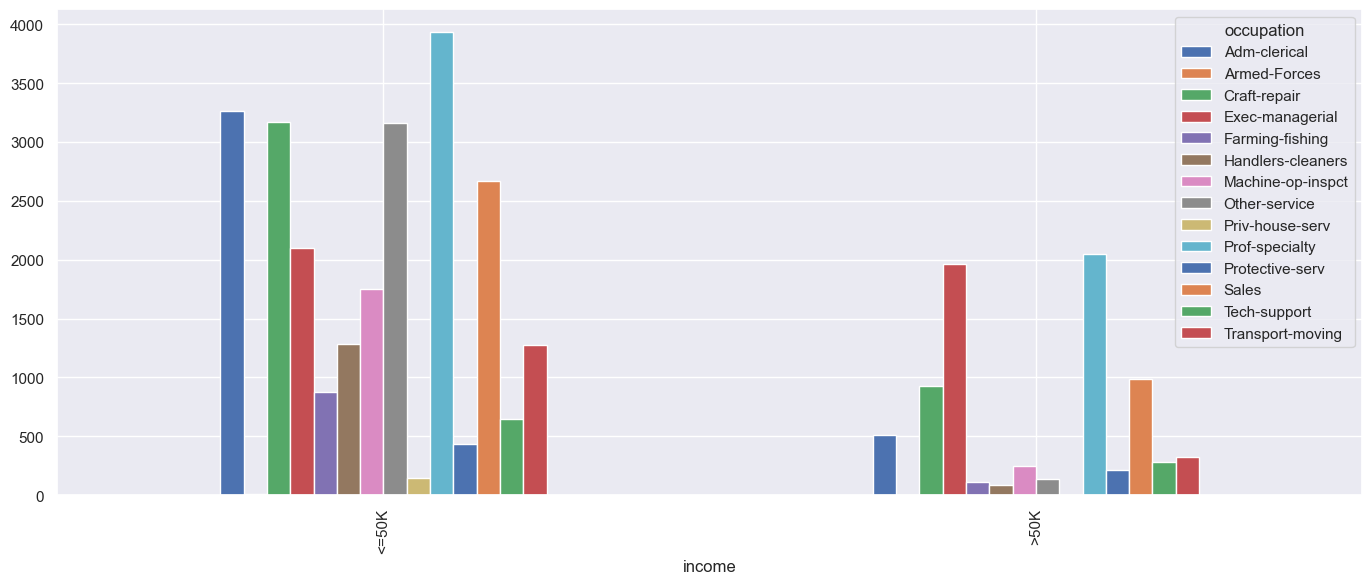

In [131]:
occupation = pd.crosstab(df['income'],df['occupation'])
occupation.plot(kind="bar")

In [132]:
catigorical_features

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [133]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [134]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for features in catigorical_features:
    df[features] = le.fit_transform(df[features])

In [135]:
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,8,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,8,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0
5,34,3,216864,11,9,0,7,4,4,0,0,3770,45,38,0
6,38,3,150601,0,6,5,0,4,4,1,0,3770,40,38,0
7,74,6,88638,10,16,4,9,2,4,0,0,3683,20,38,1
8,68,0,422013,11,9,0,9,1,4,0,0,3683,40,38,0
9,41,3,70037,15,10,4,2,4,4,1,0,3004,60,38,1


In [136]:
df['workclass'].value_counts()

workclass
3    22696
5     2541
1     2093
8     1836
6     1298
4     1116
0      960
7       14
2        7
Name: count, dtype: int64

<Axes: >

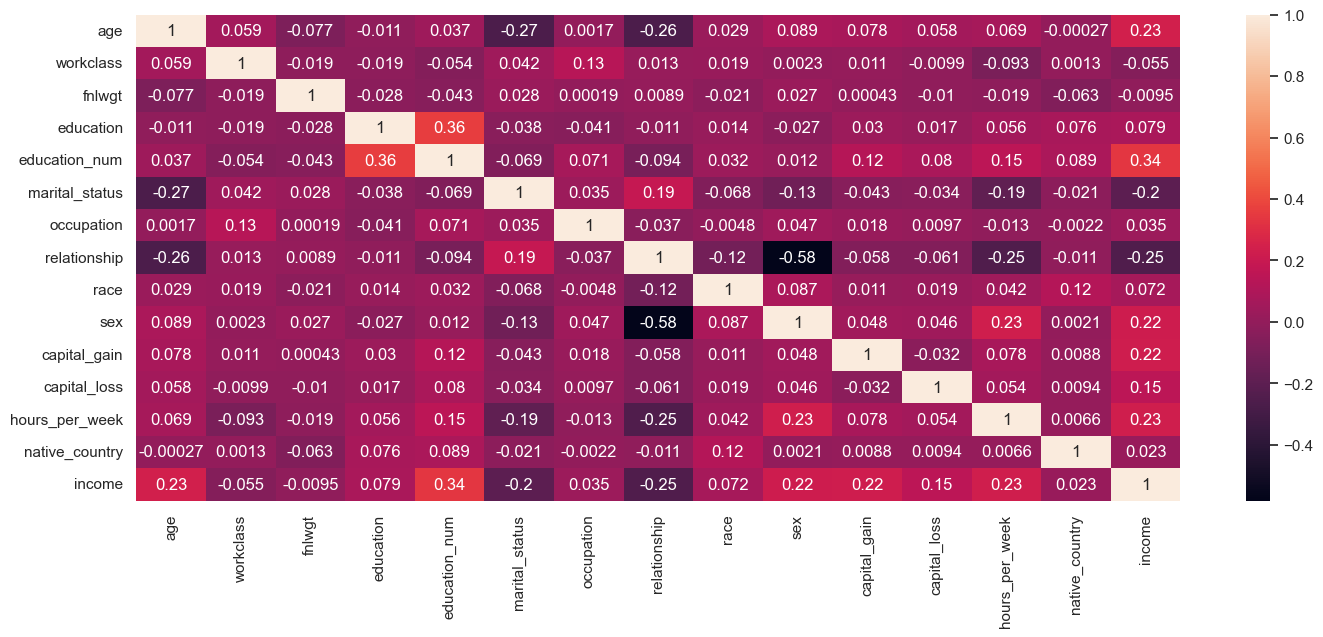

In [137]:
sns.heatmap(df.corr(),annot=True)

In [138]:
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,8,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,8,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0
5,34,3,216864,11,9,0,7,4,4,0,0,3770,45,38,0
6,38,3,150601,0,6,5,0,4,4,1,0,3770,40,38,0
7,74,6,88638,10,16,4,9,2,4,0,0,3683,20,38,1
8,68,0,422013,11,9,0,9,1,4,0,0,3683,40,38,0
9,41,3,70037,15,10,4,2,4,4,1,0,3004,60,38,1


In [139]:
df.drop(['fnlwgt', 'education', 'native_country'], axis=1, inplace=True)
df

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
0,90,8,9,6,9,1,4,0,0,4356,40,0
1,82,3,9,6,3,1,4,0,0,4356,18,0
2,66,8,10,6,9,4,2,0,0,4356,40,0
3,54,3,4,0,6,4,4,0,0,3900,40,0
4,41,3,10,5,9,3,4,0,0,3900,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3,10,4,10,1,4,1,0,0,40,0
32557,27,3,12,2,12,5,4,0,0,0,38,0
32558,40,3,9,2,6,0,4,1,0,0,40,1
32559,58,3,9,6,0,4,4,0,0,0,40,0


In [140]:
df['capital_gain'].value_counts()

capital_gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
2538         1
2387         1
1455         1
1639         1
1111         1
Name: count, Length: 119, dtype: int64

In [141]:
df.to_csv("cleaned_data", index=False)

Model Training

In [142]:
df.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
0,90,8,9,6,9,1,4,0,0,4356,40,0
1,82,3,9,6,3,1,4,0,0,4356,18,0
2,66,8,10,6,9,4,2,0,0,4356,40,0
3,54,3,4,0,6,4,4,0,0,3900,40,0
4,41,3,10,5,9,3,4,0,0,3900,40,0


In [143]:
df.shape

(32561, 12)

In [144]:
x = df.drop('income', axis=1)
y = df['income']

In [145]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [147]:
num_pipeline = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)

#For categorical we can use strategy as Most Frequent

preprocessor = ColumnTransformer([
    ("new_pipeline", num_pipeline, numerical_features)
])

In [148]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)


In [153]:
x_train.shape

(26048, 11)

In [155]:
x_test.shape

(6513, 11)

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay

In [158]:
def performance_metrics(test, predict):
    confusionmatrix = print(f"Confusion matrix: {confusion_matrix(test,predict)}")
    precisionscore = print(f"precision score: {precision_score(test,predict)}")
    f1score = print(f"f1_score: {f1_score(test, predict)}")
    recall = print(f"recall: {recall_score(test, predict)}")
    accuracyscore = print(f"accuracy_score: {accuracy_score(test, predict)}")  

    return confusionmatrix, precisionscore, f1score, recall, accuracyscore


HyperParameterTuning

In [159]:
lr = LogisticRegression()

In [160]:
parms = {
    "class_weight":['balanced'],
    "penalty":['l1', 'l2'],
    'C':[0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']

}

In [161]:
grid = GridSearchCV(estimator=lr, param_grid=parms, cv=5, n_jobs=-1, verbose=3)

In [162]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\vamsh\OneDrive\Desktop\ML project\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=3)

In [163]:
grid.best_params_

{'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}

In [164]:
grid.score(x_train, y_train)

0.7801750614250614

In [170]:
y_pred = grid.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [171]:
accuracy_score(y_test, y_pred)

0.7787501919238446

In [172]:
dr = DecisionTreeClassifier()

In [184]:
param_grid = {
    "class_weight":["balanced"],
    "criterion":["gini", "entropy", "log_loss"],
    "splitter":["best","random"],
    "max_depth":[3,4,5,6],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2,3],
    "max_features":["auto", "sqrt", "log2"]

}

In [185]:
grid_search = GridSearchCV(estimator=dr, param_grid=param_grid, cv=5, scoring='accuracy')

In [186]:
grid_search.fit(x_train,y_train)

c:\Users\vamsh\OneDrive\Desktop\ML project\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1440 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1440 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\vamsh\OneDrive\Desktop\ML project\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\vamsh\OneDrive\Desktop\ML project\venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\vamsh\OneDrive\Desktop\ML project\venv\Lib\site-packages\sklearn\base.py", line 666, in _valid

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [187]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [189]:
grid_search.score(x_train,y_train)

0.7442797911547911

In [190]:
y_pred = grid_search.predict(x_test)

In [191]:
accuracy_score(y_test, y_pred)

0.7415937356057116

In [192]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.70      0.81      4976
           1       0.47      0.87      0.61      1537

    accuracy                           0.74      6513
   macro avg       0.71      0.79      0.71      6513
weighted avg       0.83      0.74      0.76      6513



In [193]:
rf = RandomForestClassifier()

In [194]:
param_grid = {
    "class_weight":["balanced"],
    'n_estimators': [20, 50, 30],
    'max_depth': [10, 8, 5],
    'min_samples_split': [2, 5, 10],
}

In [195]:
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring="accuracy")

In [197]:
grid_search.fit(x_train,y_train)

c:\Users\vamsh\OneDrive\Desktop\ML project\venv\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'], 'max_depth': [10, 8, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 30]},
             scoring='accuracy')

In [198]:
grid_search.best_params_

{'class_weight': 'balanced',
 'max_depth': 10,
 'min_samples_split': 2,
 'n_estimators': 50}

In [200]:
grid_search.score(x_train,y_train)

0.8272420147420148

In [201]:
y_prad = grid_search.predict(x_test)

In [202]:
accuracy_score(y_test,y_prad)

0.8134500230308613

In [203]:
print(classification_report(y_test,y_prad))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      4976
           1       0.57      0.86      0.69      1537

    accuracy                           0.81      6513
   macro avg       0.76      0.83      0.78      6513
weighted avg       0.86      0.81      0.82      6513

